<a href="https://colab.research.google.com/github/Priyabrat845/QnA-Automation/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet') 
nltk.download('punkt')

from sklearn.feature_extraction.text import CountVectorizer

from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

#pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
!pip install spacy
# Restart the runtime once after intalling the spacy.
!python -m spacy download en_core_web_md


     |████████████████████████████████| 96.4 MB 1.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
!pip install pyLDAvis==3.2.1

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import string
def clean_book():
  book = open("/content/drive/MyDrive/Almabetter/ML text dataset.txt","r+") 
  book = book.read()
  
  book = book.replace('\n\n',' ')
  book = book.replace('\n',' ')
  book = book.lower()
  latters_to_keep = list((string.ascii_letters)+(string.ascii_uppercase) + " ")
  book_word = list(book)
  book_selected_latters = []
  for i in book_word:
    if i in latters_to_keep:
      book_selected_latters.append(i)
  book = ''.join(book_selected_latters)
  book_word_list = book.split()
  ultra_clean = []
  for i in book_word_list:
    if len(list(i))>1:
      ultra_clean.append(i)
  book = ' '.join(ultra_clean)
  # Removal of stopwords.
  text_tokens = word_tokenize(book)
  tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
  book = ' '.join(tokens_without_sw)

  return book

In [ ]:
clean_data=clean_book()

In [ ]:
clean_data

'preface machine learning programming computers optimize performance criterion using example data past experience need learning cases directly write computer program solve given problem need example data experience case learning necessary human expertise exist humans unable explain expertise consider recognition spoken speechthat converting acoustic speech signal ascii text task seemingly without diculty unable explain dierent people utter word dierently due dierences age gender accent machine learning approach collect large collection sample utterances dierent people learn map words another case problem solved changes time depends particular environment would like generalpurpose systems adapt circumstances rather explicitly writing dierent program special circumstance consider routing packets computer network path maximizing quality service source destination changes continuously network trac changes learning routing program able adapt best path monitoring network trac another example

In [ ]:
len(clean_data)

544238

In [ ]:
!pip install -U pandas-profiling

In [ ]:
import spacy
nlp = spacy.load("en_core_web_md", disable=['parser', 'ner'])

In [ ]:
# Tokenizing the words.
def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

In [ ]:
tokenized_texts = lemmatization(clean_data)

In [ ]:
print(tokenized_texts[1])

[]


In [ ]:
len(tokenized_texts)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_data.split())
print(X.shape)


(71022, 6287)


In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

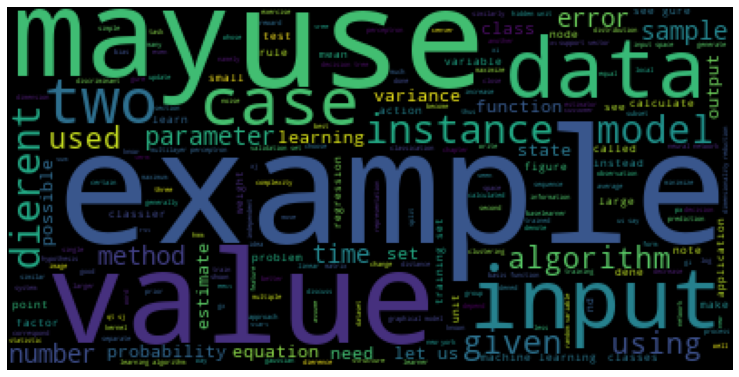

<Figure size 360x216 with 0 Axes>

In [ ]:
plt.rcParams["figure.figsize"] = (13,10)
text = clean_data
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.figure(figsize=(5,3))
plt.show()

According to this word cloud:
**Example**, **Data**, **Value**, **Input**, **Algorithm**, **Model**, **Instance**, **Case**, **Equation** are the most important words in this article.


In [ ]:
# clean_data

In [ ]:
len(clean_data)

544238

In [ ]:
# Make the dataframe of texts.
data = pd.DataFrame({'Texts': clean_data},index=[0])
data.head()

,Texts
0,preface machine learning programming computers...


In [ ]:
def words_count(data):
  count = []
  word = [] 
  all_words = ' '.join(data['Texts']).split()
  for i in set(all_words):
    word.append(i)
    count.append(all_words.count(i))
  word_count_df = pd.DataFrame({'Words': word,'Count':count},columns=['Words','Count']).sort_values(by='Count', ascending=False)
  return word_count_df

In [ ]:
word_count = words_count(data)
word_count[0:20]

,Words,Count
3523,learning,603
4806,example,526
5857,data,474
5633,error,424
2903,two,418
5648,may,405
3206,training,400
2271,given,399
2614,model,381
4656,use,371


In [ ]:
import plotly.express as px
px.bar(word_count[0:50],x = 'Words',y= 'Count',title='Words VS Frequency graph')

According to the above graph:
Learning is the most frequent word with frequency of 603.

*   Learning is the most frequent word with frequency of **603**.
*   Other most frequent words are **Example**, **Data**, **Error**, **Training**, **Model**.


(0.0, 1000.0)

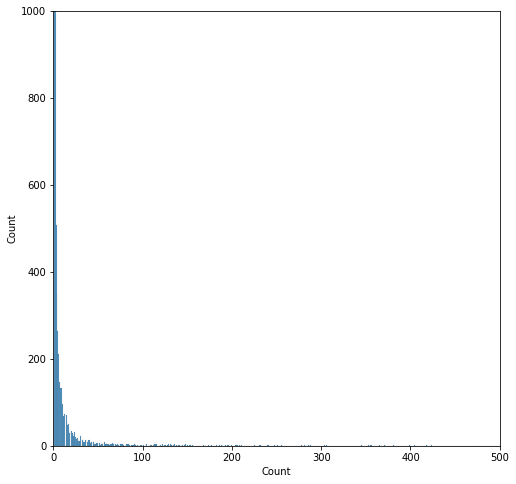

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(word_count['Count'],bins=700)
plt.xlim((0,500))
plt.ylim((0,1000))

According to above graph,most of the articles word counts is in the range of **0-100**. 

